## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL: 


Student Name: Cassidy Exum

Student Pace: Flex/part time, 40 week pace

Schedule Project Review Date/Time:

Instructor Name: Morgan Jones

Blog Post URL: https://exumexaminesdata.blogspot.com/2022/06/data-analysis-and-solar-energy.html

# Project Overview
## Business Understanding
My goal is to analyze movie metrics such as rating, profit, runtime, budget, etc and come up with three proposals for microsofts new studio. Let's break down how I'm going to do this. Using Pandas and Sqlite I'll read in the different data sets. It seems like we have a plethora of data so I'm not too concerned about cleaning it, I can most likely just get rid of any bad rows of data. Making movies for a large studio is a business decision, it's not for the love of film, so we are going to proceed with that intnet in mind and keep budget and profit at the forefront. And now for analysis and proposals:
### Proposal 1 - What genres perform the best? What genre movie should we make?
For the first proposal I'm going to go through the data find the best genres. Genre is fairly general so it will leave us with plenty of movie options to make once we find genres that are successful.

### Proposal 2 - Recent Success
For the second proposal we will look at only the last 2 years and figure out what movies have done the best. With this we will have a second approach that will follow recent trends.


### Proposal 3 - 


In [1]:
#import whats needed, set matplotlib inline
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline

In [2]:
#Acess the data -

file_path_1 = 'zippedData/bom.movie_gross.csv.gz'
file_path_2 = 'zippedData/rt.movie_info.tsv.gz'
file_path_3 = 'zippedData/rt.reviews.tsv.gz'
file_path_4 = 'zippedData/tmdb.movies.csv.gz'
file_path_5 = 'zippedData/tn.movie_budgets.csv.gz'
db = 'zippedData/im.db'

bom_movie_gross = pd.read_csv(file_path_1)
rt_movie_info = pd.read_csv(file_path_2, sep="\t", index_col = 0)
#rt_reviews = pd.read_csv(file_path_3, sep="\t")
#rt_review not working. Have enough data, we can ignore.
tmdb_movies = pd.read_csv(file_path_4, index_col = 0)
tn_movie_budgets = pd.read_csv(file_path_5, index_col = 0)

conn = sqlite3.connect(db)

In [3]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
rt_movie_info.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [5]:
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [6]:
tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
pd.read_sql("""
SELECT *
FROM movie_basics
""", conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Ok, we generally know what the data looks like now.

The rt_movie_info table looks a bit useless. We have no title for the movies and thats essentially the primary key connecting all of these files/db's together. All the others seem good and useful so we will ignore that one for now.

Lets start by using the IMBD sqlite db to find the highest rated movies

In [8]:
highest_rated = pd.read_sql("""
SELECT original_title, genres, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
ORDER BY averagerating DESC
""", conn)

In [9]:
highest_rated.head(20)

,original_title,genres,averagerating,numvotes
0,Exteriores: Mulheres Brasileiras na Diplomacia,Documentary,10.0,5
1,The Dark Knight: The Ballad of the N Word,"Comedy,Drama",10.0,5
2,Freeing Bernie Baran,"Crime,Documentary",10.0,5
3,Hercule contre Hermès,Documentary,10.0,5
4,I Was Born Yesterday!,Documentary,10.0,6
5,Dog Days in the Heartland,Drama,10.0,5
6,Revolution Food,Documentary,10.0,8
7,Fly High: Story of the Disc Dog,Documentary,10.0,7
8,All Around Us,Documentary,10.0,6
9,Atlas Mountain: Barbary Macaques - Childcaring...,Documentary,10.0,5


Honestly, not very useful... Way too many documentaries, and way too few votes. Lets look at the numvotes column and determine some number of votes that we feel a movie must have to be included

In [10]:
print(highest_rated['numvotes'].mean())
# Lets arbitrarily choose 2000

3523.6621669194105


In [11]:
highest_rated = pd.read_sql("""
SELECT original_title, genres, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE numvotes > 2000
ORDER BY averagerating DESC
""", conn)
highest_rated.head(20)

,original_title,genres,averagerating,numvotes
0,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600
1,Ekvtime: Man of God,"Biography,Drama,History",9.6,2604
2,Aloko Udapadi,"Drama,History",9.5,6509
3,Peranbu,Drama,9.4,9629
4,Dag II,"Action,Drama,War",9.3,100568
5,Aynabaji,"Crime,Mystery,Thriller",9.3,18470
6,Wheels,Drama,9.3,17308
7,Natsamrat,"Drama,Family",9.2,4297
8,C/o Kancharapalem,Drama,9.2,2195
9,CM101MMXI Fundamentals,"Comedy,Documentary",9.2,41560


I think we also want to make the region US / language ENG and eliminate pure Documentaries

In [12]:
highest_rated = pd.read_sql("""
SELECT original_title, genres, averagerating, numvotes, region
FROM movie_basics
INNER JOIN movie_ratings
    USING(movie_id)
INNER JOIN movie_akas
    USING(movie_id)
WHERE numvotes > 2000 AND genres NOT LIKE "%Documentary%" AND region = "US"
ORDER BY averagerating DESC
""", conn)
highest_rated.drop_duplicates(subset = "original_title", inplace = True)

In [13]:
highest_rated.head(20)

,original_title,genres,averagerating,numvotes,region
0,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600,US
2,Peranbu,Drama,9.4,9629,US
3,Wheels,Drama,9.3,17308,US
4,Inception,"Action,Adventure,Sci-Fi",8.8,1841066,US
8,Kill Bill: The Whole Bloody Affair,"Action,Crime,Thriller",8.8,3406,US
9,Avengers: Endgame,"Action,Adventure,Sci-Fi",8.8,441135,US
12,96,"Drama,Romance",8.8,10903,US
13,Super Deluxe,"Action,Crime,Drama",8.8,2254,US
14,Mahanati,"Biography,Drama",8.7,6917,US
15,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334,US


Now we have some actual data. Lets start looking at the profit info and start relating that to genres and things like that. Because I limited the previous table to US release, I'm going to limit our gross to domestic as well.

In [14]:
bom_movie_gross.sort_values('domestic_gross')

,title,studio,domestic_gross,foreign_gross,year
1476,Storage 24,Magn.,100.0,NaN,2013
2321,The Chambermaid,FM,300.0,NaN,2015
2756,News From Planet Mars,KL,300.0,NaN,2016
2757,Satanic,Magn.,300.0,NaN,2016
1018,Apartment 143,Magn.,400.0,426000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000,2015
2392,Finding Mr. Right 2,CL,NaN,114700000,2016
2468,Solace,LGP,NaN,22400000,2016
2595,Viral,W/Dim.,NaN,552000,2016


Ok now we are running into NaN issues. Lets figure out if we can remove them.

In [15]:
bom_movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [16]:
bom_movie_gross.drop('foreign_gross', axis = 1, inplace = True)

In [17]:
bom_movie_gross = bom_movie_gross.dropna()
bom_movie_gross = bom_movie_gross.sort_values('domestic_gross', ascending=False)

In [18]:
bom_movie_gross

,title,studio,domestic_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,2015
3080,Black Panther,BV,700100000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,2018
1873,Jurassic World,Uni.,652300000.0,2015
727,Marvel's The Avengers,BV,623400000.0,2012
...,...,...,...,...
1018,Apartment 143,Magn.,400.0,2012
2757,Satanic,Magn.,300.0,2016
2756,News From Planet Mars,KL,300.0,2016
2321,The Chambermaid,FM,300.0,2015


In [19]:
gross_and_rating_df = bom_movie_gross.merge(highest_rated, how='inner', left_on='title', right_on='original_title')

In [20]:
gross_and_rating_df.head(20)

,title,studio,domestic_gross,year,original_title,genres,averagerating,numvotes,region
0,Black Panther,BV,700100000.0,2018,Black Panther,"Action,Adventure,Sci-Fi",7.3,516148,US
1,Avengers: Infinity War,BV,678800000.0,2018,Avengers: Infinity War,"Action,Adventure,Sci-Fi",8.5,670926,US
2,Jurassic World,Uni.,652300000.0,2015,Jurassic World,"Action,Adventure,Sci-Fi",7.0,539338,US
3,Incredibles 2,BV,608600000.0,2018,Incredibles 2,"Action,Adventure,Animation",7.7,203510,US
4,Finding Dory,BV,486300000.0,2016,Finding Dory,"Adventure,Animation,Comedy",7.3,213542,US
5,Avengers: Age of Ultron,BV,459000000.0,2015,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",7.3,665594,US
6,The Dark Knight Rises,WB,448100000.0,2012,The Dark Knight Rises,"Action,Thriller",8.4,1387769,US
7,The Hunger Games: Catching Fire,LGF,424700000.0,2013,The Hunger Games: Catching Fire,"Action,Adventure,Sci-Fi",7.5,575455,US
8,Jurassic World: Fallen Kingdom,Uni.,417700000.0,2018,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",6.2,219125,US
9,Toy Story 3,BV,415000000.0,2010,Toy Story 3,"Adventure,Animation,Comedy",8.3,682218,US


/Users/cassidyexum/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


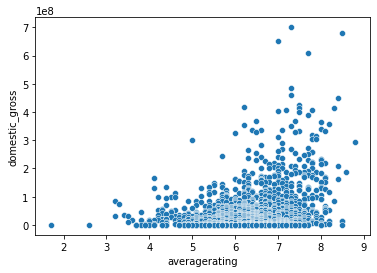

In [21]:
y = gross_and_rating_df['domestic_gross']
x = gross_and_rating_df['averagerating']
sea.scatterplot(x, y);

In [22]:
genres_df = gross_and_rating_df['genres'].iloc[:200]
genres_df = genres_df.str.split(',')
genres_list = genres_df.tolist()
genres_dict = {}
for x in genres_list:
    for y in x:
        if y not in genres_dict:
            genres_dict[y] = 1
        else:
            genres_dict[y] += 1


In [23]:
genres_dict

{'Action': 97,
 'Adventure': 126,
 'Sci-Fi': 39,
 'Animation': 47,
 'Comedy': 81,
 'Thriller': 24,
 'Fantasy': 20,
 'Biography': 13,
 'Drama': 41,
 'Horror': 8,
 'Family': 12,
 'Mystery': 11,
 'Crime': 18,
 'Music': 3,
 'History': 5,
 'Romance': 9,
 'Musical': 2,
 'Western': 2,
 'Sport': 2}

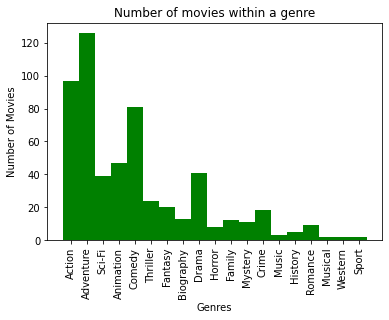

In [24]:
width = 1
plt.bar(genres_dict.keys(), genres_dict.values(), width, color='g')
plt.title('Number of movies within a genre')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation = 90);

### Reccomendation 1 - Make an action, adventure, scifi, comedy film
So it looks like rating plays some effect on domestic gross, but not too much of an effect. Something that we can see from the top 20 we posted earlier is the similarity in genres. Action, adventure, comedy, and SciFi are all constantly being repeated. So lets make this our first reccomendation. Make a movie that is an action, adventure, scifi, and comedy.

## Recent Trends
Lets combine some tables and find films in the last 2 years (our data ends in 2018 so we will use 2016, 2017, and 2018) that have done exceptionally well.

tn_movie_budgets will be a great table to use for this.

In [25]:
tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [26]:
tn_movie_budgets_recent = tn_movie_budgets.sort_values('release_date', ascending = False)

In [27]:
release_date = pd.to_datetime(tn_movie_budgets_recent['release_date'])

In [28]:
tn_movie_budgets_recent['release_date'] = release_date

In [29]:
tn_movie_budgets_recent.sort_values('release_date', ascending = False, inplace = True)

In [30]:
tn_movie_budgets_recent.head(25)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
6,2020-12-31,Hannibal the Conqueror,"$50,000,000",$0,$0
95,2020-12-31,Moonfall,"$150,000,000",$0,$0
36,2020-02-21,Call of the Wild,"$82,000,000",$0,$0
30,2019-12-31,Reagan,"$25,000,000",$0,$0
81,2019-12-31,Army of the Dead,"$90,000,000",$0,$0
72,2019-12-31,355,"$75,000,000",$0,$0
13,2019-12-31,Rogue City,"$13,000,000",$0,$0
16,2019-12-31,Eli,"$11,000,000",$0,$0
44,2019-12-31,Down Under Cover,"$40,000,000",$0,$0


Everything before 2019-06-21 is too recent and has $0 as the listed gross. Lets drop those.

In [31]:
tn_movie_budgets_recent.drop(index=tn_movie_budgets_recent.index[:20], axis=0, inplace=True)

In [32]:
tn_movie_budgets_recent.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
42,2019-06-14,Men in Black: International,"$110,000,000","$3,100,000","$3,100,000"
98,2019-06-14,Shaft,"$30,000,000","$600,000","$600,000"
3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
35,2019-06-07,Late Night,"$4,000,000","$246,305","$246,305"
25,2019-05-31,Godzilla: King of the Monsters,"$170,000,000","$85,576,941","$299,276,941"


In [33]:
recent_imdb = pd.read_sql("""
SELECT original_title, start_year, genres, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE numvotes > 2000 AND genres NOT LIKE "%Documentary%"
ORDER BY start_year DESC, averagerating DESC
""", conn)
recent_imdb.head(20)

,original_title,start_year,genres,averagerating,numvotes
0,Once Upon a Time ... in Hollywood,2019,"Comedy,Drama",9.7,5600
1,Avengers: Endgame,2019,"Action,Adventure,Sci-Fi",8.8,441135
2,Super Deluxe,2019,"Action,Crime,Drama",8.8,2254
3,Uri: The Surgical Strike,2019,"Action,Drama,War",8.6,30292
4,Yatra,2019,"Biography,Drama",8.6,2913
5,The Tashkent Files,2019,"Drama,Mystery,Thriller",8.4,3175
6,Gully Boy,2019,"Drama,Music",8.3,17483
7,Badla,2019,"Crime,Drama,Mystery",8.1,9988
8,John Wick: Chapter 3 - Parabellum,2019,"Action,Crime,Thriller",8.0,81568
9,Maharshi,2019,"Action,Drama",8.0,2733


In [34]:
recents_merged_df = tn_movie_budgets_recent.merge(recent_imdb, how='inner', left_on='movie', right_on='original_title')

In [35]:
recents_merged_df.sort_values('release_date', ascending = False, inplace = True)
recents_merged_df.head(20)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,original_title,start_year,genres,averagerating,numvotes
0,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix,2019,"Action,Adventure,Sci-Fi",6.0,24451
1,2019-05-31,Godzilla: King of the Monsters,"$170,000,000","$85,576,941","$299,276,941",Godzilla: King of the Monsters,2019,"Action,Adventure,Fantasy",6.7,36479
2,2019-05-10,The Professor and the Madman,"$25,000,000",$0,"$5,227,233",The Professor and the Madman,2019,"Biography,Drama,Mystery",7.4,10383
3,2019-05-03,Long Shot,"$40,000,000","$30,202,860","$43,711,031",Long Shot,2019,"Comedy,Romance",7.2,12814
4,2019-04-12,Hellboy,"$50,000,000","$21,903,748","$40,725,492",Hellboy,2019,"Action,Adventure,Fantasy",5.4,19534
6,2019-04-05,Pet Sematary,"$21,000,000","$54,724,696","$109,501,146",Pet Sematary,2019,"Horror,Mystery,Thriller",6.0,34472
8,2019-04-05,Shazam!,"$85,000,000","$139,606,856","$362,899,733",Shazam!,2019,"Action,Adventure,Comedy",7.4,109051
9,2019-03-29,Unplanned,"$6,000,000","$18,107,621","$18,107,621",Unplanned,2019,"Biography,Drama",6.3,5945
10,2019-03-29,Dumbo,"$170,000,000","$113,883,318","$345,004,422",Dumbo,2019,"Adventure,Family,Fantasy",6.6,25072
11,2019-03-22,Us,"$20,000,000","$175,006,930","$254,210,310",Us,2019,"Horror,Mystery,Thriller",7.1,102511


Lets find the most profitable movies (domestic gross - budget) of the last 3 years (roughly 300 movies)


In [36]:
recents_df = recents_merged_df.drop(index=recents_merged_df.index[300:], axis=0)

In [37]:
recents_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,original_title,start_year,genres,averagerating,numvotes
0,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix,2019,"Action,Adventure,Sci-Fi",6.0,24451
1,2019-05-31,Godzilla: King of the Monsters,"$170,000,000","$85,576,941","$299,276,941",Godzilla: King of the Monsters,2019,"Action,Adventure,Fantasy",6.7,36479
2,2019-05-10,The Professor and the Madman,"$25,000,000",$0,"$5,227,233",The Professor and the Madman,2019,"Biography,Drama,Mystery",7.4,10383
3,2019-05-03,Long Shot,"$40,000,000","$30,202,860","$43,711,031",Long Shot,2019,"Comedy,Romance",7.2,12814
4,2019-04-12,Hellboy,"$50,000,000","$21,903,748","$40,725,492",Hellboy,2019,"Action,Adventure,Fantasy",5.4,19534
...,...,...,...,...,...,...,...,...,...,...
304,2016-07-29,Jason Bourne,"$120,000,000","$162,192,920","$416,168,316",Jason Bourne,2016,"Action,Thriller",6.6,190596
307,2016-07-22,Ice Age: Collision Course,"$105,000,000","$64,063,008","$402,156,682",Ice Age: Collision Course,2016,"Adventure,Animation,Comedy",5.7,48932
306,2016-07-22,Lights Out,"$5,000,000","$67,268,835","$148,806,510",Lights Out,2016,"Drama,Horror,Mystery",6.3,100650
305,2016-07-22,Star Trek Beyond,"$185,000,000","$158,848,340","$335,802,233",Star Trek Beyond,2016,"Action,Adventure,Sci-Fi",7.1,209844


In [38]:
recents_df['domestic_gross'] = recents_df['domestic_gross'].str.strip('$')
recents_df['production_budget'] = recents_df['production_budget'].str.strip('$')

recents_df['domestic_gross'] = recents_df['domestic_gross'].str.replace(',','')
recents_df['production_budget'] = recents_df['production_budget'].str.replace(',','')


In [39]:
recents_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,original_title,start_year,genres,averagerating,numvotes
0,2019-06-07,Dark Phoenix,350000000,42762350,"$149,762,350",Dark Phoenix,2019,"Action,Adventure,Sci-Fi",6.0,24451
1,2019-05-31,Godzilla: King of the Monsters,170000000,85576941,"$299,276,941",Godzilla: King of the Monsters,2019,"Action,Adventure,Fantasy",6.7,36479
2,2019-05-10,The Professor and the Madman,25000000,0,"$5,227,233",The Professor and the Madman,2019,"Biography,Drama,Mystery",7.4,10383
3,2019-05-03,Long Shot,40000000,30202860,"$43,711,031",Long Shot,2019,"Comedy,Romance",7.2,12814
4,2019-04-12,Hellboy,50000000,21903748,"$40,725,492",Hellboy,2019,"Action,Adventure,Fantasy",5.4,19534
...,...,...,...,...,...,...,...,...,...,...
304,2016-07-29,Jason Bourne,120000000,162192920,"$416,168,316",Jason Bourne,2016,"Action,Thriller",6.6,190596
307,2016-07-22,Ice Age: Collision Course,105000000,64063008,"$402,156,682",Ice Age: Collision Course,2016,"Adventure,Animation,Comedy",5.7,48932
306,2016-07-22,Lights Out,5000000,67268835,"$148,806,510",Lights Out,2016,"Drama,Horror,Mystery",6.3,100650
305,2016-07-22,Star Trek Beyond,185000000,158848340,"$335,802,233",Star Trek Beyond,2016,"Action,Adventure,Sci-Fi",7.1,209844


In [40]:
recents_df['domestic_gross'] = recents_df['domestic_gross'].astype(int)
recents_df['production_budget'] = recents_df['production_budget'].astype(int)

In [41]:
recents_df['profit'] = recents_df['domestic_gross'] - recents_df['production_budget']

In [42]:
recents_df.sort_values('profit', ascending = False, inplace = True)

In [43]:
recents_df.head(20)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,original_title,start_year,genres,averagerating,numvotes,profit
117,2018-02-16,Black Panther,200000000,700059566,"$1,348,258,224",Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,516148,500059566
217,2017-03-17,Beauty and the Beast,160000000,504014165,"$1,259,199,706",Beauty and the Beast,2017,"Family,Fantasy,Musical",7.2,238325,344014165
133,2017-12-20,Jumanji: Welcome to the Jungle,90000000,404508916,"$964,496,193",Jumanji: Welcome to the Jungle,2017,"Action,Adventure,Comedy",7.0,242735,314508916
164,2017-09-08,It,35000000,327481748,"$697,457,969",It,2017,"Horror,Thriller",7.4,359123,292481748
188,2017-06-02,Wonder Woman,150000000,412563408,"$821,133,378",Wonder Woman,2017,"Action,Adventure,Fantasy",7.5,487527,262563408
15,2019-03-08,Captain Marvel,175000000,426525952,"$1,123,061,550",Captain Marvel,2019,"Action,Adventure,Sci-Fi",7.0,296225,251525952
90,2018-05-18,Deadpool 2,110000000,324591735,"$786,680,557",Deadpool 2,2018,"Action,Adventure,Comedy",7.8,391735,214591735
249,2016-12-21,Sing,75000000,270329045,"$634,454,789",Sing,2016,"Animation,Comedy,Family",7.1,115951,195329045
223,2017-02-24,Get Out,5000000,176040665,"$255,367,951",Get Out,2017,"Horror,Mystery,Thriller",7.7,400474,171040665
99,2018-04-06,A Quiet Place,17000000,188024361,"$334,522,294",A Quiet Place,2018,"Drama,Horror,Sci-Fi",7.6,305031,171024361


In [44]:
#remove all the negatives

recents_pos_df = recents_df[recents_df['profit']>0]

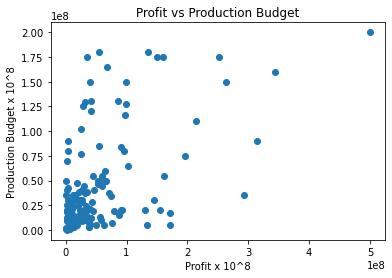

In [45]:
x = recents_pos_df['profit']
y = recents_pos_df['production_budget']

plt.scatter(x, y)
plt.title('Profit vs Production Budget')
plt.xlabel('Profit x 10^8')
plt.ylabel('Production Budget x 10^8')
plt.show()

So there isnt exactly a relation between budget and profit. But have some budget generally gets you some profit. So lets take the average budget and reccomend that as the target budget for our film studio.

In [46]:
recents_pos_df['production_budget'].mean()

42959589.04109589

### Reccomendation 2 - Target Budget = $43,000,000

## People - Who can we get on a film that will draw a crowd?
How can we get this info? 
* IMDB Sql database has a persons tables with a person_id and primary name.

One we have the person what do we want?
* lets generate a list of films for each person_id and determine with person_id has the highest average ratings of all the films they've been on. 

In [47]:
persons_df = pd.read_sql("""
SELECT p.primary_name,  
        mr.averagerating, 
        COUNT(DISTINCT mb.primary_title) as num_movies
FROM directors as d
JOIN persons as p
    USING(person_id)
JOIN principals
    USING(person_id)
JOIN movie_basics as mb
    USING(movie_id)
JOIN movie_ratings as mr
    USING(movie_id)
WHERE numvotes > 3000
GROUP BY p.primary_name
HAVING num_movies > 5
""", conn)

In [48]:
persons_df

,primary_name,averagerating,num_movies
0,A.R. Murugadoss,6.8,7
1,Adam Wingard,5.3,8
2,Alex Gibney,7.3,8
3,Anurag Kashyap,8.1,9
4,Baltasar Kormákur,6.6,6
5,Ben Wheatley,5.6,6
6,Clint Eastwood,6.5,7
7,Darren Lynn Bousman,6.4,7
8,David Gordon Green,6.4,8
9,Denis Villeneuve,8.3,6


In [49]:
persons_df.drop_duplicates(inplace = True)
persons_df.sort_values('averagerating', ascending = False, inplace=True)
persons_df.head()

,primary_name,averagerating,num_movies
9,Denis Villeneuve,8.3,6
3,Anurag Kashyap,8.1,9
21,Ridley Scott,8.0,7
32,Tim Story,7.4,7
30,Takashi Miike,7.4,6


In order to get rid of outliers we limited our results directors with more than 5 movies, and those movies needed to have more than 3000 votes. Then we started those directors by the average rating of their films. This is the list we should use to select a director for any film our studio wishes to make. Don't choose arbitrarily though, some directors are from non US regions, and directors typically stay within genres. So it important to do research here as well.

There is no relationship between the number of movies and the average rating

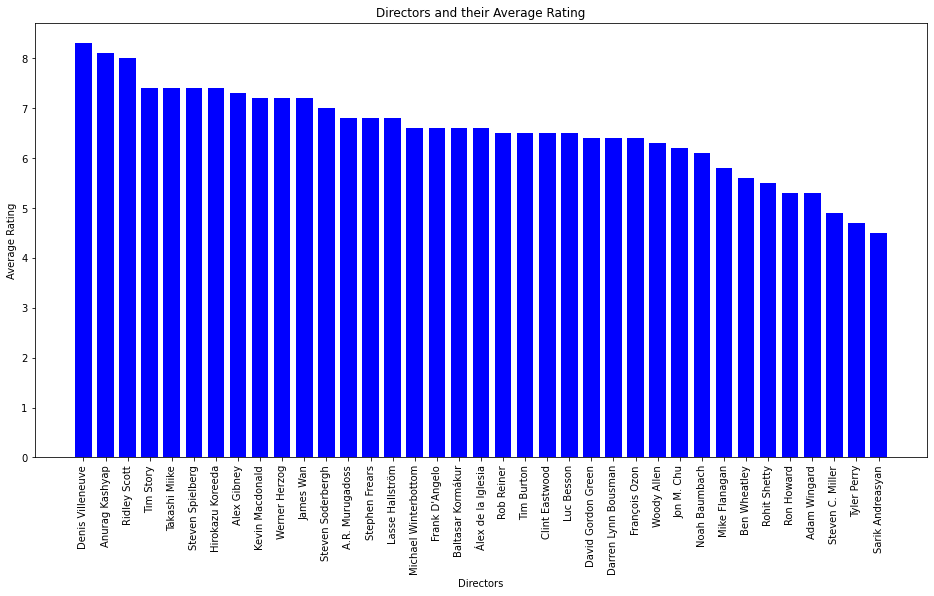

In [51]:
x = persons_df['primary_name']
y = persons_df['averagerating']
plt.figure(figsize=(16, 8))
plt.bar(x, y, width = .75, color='b')
plt.title('Directors and their Average Rating')
plt.xlabel('Directors')
plt.ylabel('Average Rating')
plt.xticks(rotation = 90);


### Reccomendation 3 - Use the above list to select a director for any film the studio wishes to make